In [126]:
import pandas as ps
import matplotlib.pyplot as mt
import seaborn as sb
import numpy as np

In [127]:
atp = ps.read_csv('atp_matches_2023.csv')

In [128]:
atp['tourney_date'] = ps.to_datetime(atp['tourney_date'] , format='%Y%m%d')
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,2023-01-02,300,126203,3.0,NaN,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,2023-01-02,299,126207,NaN,NaN,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,2023-01-02,296,126203,3.0,NaN,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,2023-01-02,295,126207,NaN,NaN,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,2023-01-02,292,126774,1.0,NaN,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4,D,2023-02-04,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0


In [129]:
atp['year'] = ps.DatetimeIndex(atp['tourney_date']).year
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
0,2023-9900,United Cup,Hard,18,A,2023-01-02,300,126203,3.0,NaN,...,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0,2023
1,2023-9900,United Cup,Hard,18,A,2023-01-02,299,126207,NaN,NaN,...,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0,2023
2,2023-9900,United Cup,Hard,18,A,2023-01-02,296,126203,3.0,NaN,...,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0,2023
3,2023-9900,United Cup,Hard,18,A,2023-01-02,295,126207,NaN,NaN,...,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0,2023
4,2023-9900,United Cup,Hard,18,A,2023-01-02,292,126774,1.0,NaN,...,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,NaN,4,D,2023-02-04,5,202335,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1717.0,1.0,2023
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,1,117365,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,990.0,11.0,279.0,190.0,2023
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,2,121411,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,364.0,131.0,894.0,15.0,2023
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,NaN,4,D,2023-02-03,4,144949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,894.0,15.0,285.0,184.0,2023


In [130]:
atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2986 entries, 0 to 2985
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          2986 non-null   object        
 1   tourney_name        2986 non-null   object        
 2   surface             2933 non-null   object        
 3   draw_size           2986 non-null   int64         
 4   tourney_level       2986 non-null   object        
 5   tourney_date        2986 non-null   datetime64[ns]
 6   match_num           2986 non-null   int64         
 7   winner_id           2986 non-null   int64         
 8   winner_seed         1250 non-null   float64       
 9   winner_entry        473 non-null    object        
 10  winner_name         2986 non-null   object        
 11  winner_hand         2986 non-null   object        
 12  winner_ht           2782 non-null   float64       
 13  winner_ioc          2986 non-null   object      

In [131]:
qwe = atp.isnull().sum() 
qwe
# columns with total number of null values data points in it 

tourney_id               0
tourney_name             0
surface                 53
draw_size                0
tourney_level            0
tourney_date             0
match_num                0
winner_id                0
winner_seed           1736
winner_entry          2513
winner_name              0
winner_hand              0
winner_ht              204
winner_ioc               0
winner_age               1
loser_id                 0
loser_seed            2217
loser_entry           2291
loser_name               0
loser_hand               0
loser_ht               336
loser_ioc                0
loser_age                7
score                    0
best_of                  0
round                    0
minutes                232
w_ace                  171
w_df                   171
w_svpt                 171
w_1stIn                171
w_1stWon               171
w_2ndWon               171
w_SvGms                171
w_bpSaved              171
w_bpFaced              171
l_ace                  171
l

In [132]:
atp.isnull().sum().sum()

#in total 12k missing values

12774

In [218]:
#creating a primary key called match_id using tourney_id and match_num to uniquely identify each match stats
atp['match_id'] = atp['tourney_id'].astype(str).str.cat(atp['match_num'].astype(str), sep = '_')
atp['match_id']

0       2023-9900_300
1       2023-9900_299
2       2023-9900_296
3       2023-9900_295
4       2023-9900_292
            ...      
2758    2023-7696_293
2759    2023-7696_292
2761    2023-7696_290
2763    2023-7696_288
2765    2023-7696_286
Name: match_id, Length: 2607, dtype: object

In [227]:
#splitting match details columns 
#we create a new datagframe to do the splitting to preserve the original dataframe, the new primary key match_id will be used to rejoin it with the original dataframe
scrcs = atp[['score', 'match_id']]

scrcs[['rn1' ,'rn2' , 'rn3' , 'rn4' , 'rn5']] = scrcs['score'].str.split(' ', expand = True)
scrcs.drop('score' , axis='columns', inplace=True)

scrcs

C:\Users\shrey\AppData\Local\Temp\ipykernel_49296\1089270550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrcs[['rn1' ,'rn2' , 'rn3' , 'rn4' , 'rn5']] = scrcs['score'].str.split(' ', expand = True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_49296\1089270550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scrcs[['rn1' ,'rn2' , 'rn3' , 'rn4' , 'rn5']] = scrcs['score'].str.split(' ', expand = True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_49296\1089270550.py:4: SettingWithCopyWarning: 
A value 

,match_id,rn1,rn2,rn3,rn4,rn5
0,2023-9900_300,7-6(4),7-6(6),None,None,None
1,2023-9900_299,6-2,0-0,RET,None,None
2,2023-9900_296,7-6(5),7-6(5),None,None,None
3,2023-9900_295,6-3,6-3,None,None,None
4,2023-9900_292,4-6,7-6(2),6-4,None,None
...,...,...,...,...,...,...
2758,2023-7696_293,4-1,4-1,4-2,None,None
2759,2023-7696_292,3-4(4),4-2,4-3(1),1-4,4-3(3)
2761,2023-7696_290,4-2,2-4,4-3(7),4-1,None
2763,2023-7696_288,4-2,4-3(3),3-4(3),3-4(5),4-3(4)


In [133]:
#list of columns that have missing values

null_columns = atp.columns[atp.isnull().sum != 0]
null_columns

C:\Users\shrey\AppData\Local\Temp\ipykernel_49296\1964779849.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  null_columns = atp.columns[atp.isnull().sum != 0]


array([['tourney_id', 'tourney_name', 'surface', 'draw_size',
        'tourney_level', 'tourney_date', 'match_num', 'winner_id',
        'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
        'winner_ht', 'winner_ioc', 'winner_age', 'loser_id',
        'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
        'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of',
        'round', 'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn',
        'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved', 'w_bpFaced',
        'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon', 'l_2ndWon',
        'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
        'winner_rank_points', 'loser_rank', 'loser_rank_points', 'year']],
      dtype=object)

In [134]:
clean_atp_rows = atp.dropna(axis = 1)
clean_atp_rows.count()

tourney_id       2986
tourney_name     2986
draw_size        2986
tourney_level    2986
tourney_date     2986
match_num        2986
winner_id        2986
winner_name      2986
winner_hand      2986
winner_ioc       2986
loser_id         2986
loser_name       2986
loser_hand       2986
loser_ioc        2986
score            2986
best_of          2986
round            2986
year             2986
dtype: int64

In [135]:
tounrys = ps.DataFrame(atp['tourney_name'].value_counts())
tounrys.reset_index(inplace  = True)
tounrys.rename({'index' : 'tourney_name' , 'tourney_name' : 'counts'}, axis=1 , inplace= True)
top_tourney = tounrys[tounrys.counts > 50]
top_tourney

,tourney_name,counts
0,Roland Garros,127
1,Australian Open,127
2,Wimbledon,127
3,Us Open,127
4,Madrid Masters,95
5,Rome Masters,95
6,Miami Masters,95
7,Indian Wells Masters,95
8,Shanghai Masters,95
9,Cincinnati Masters,55


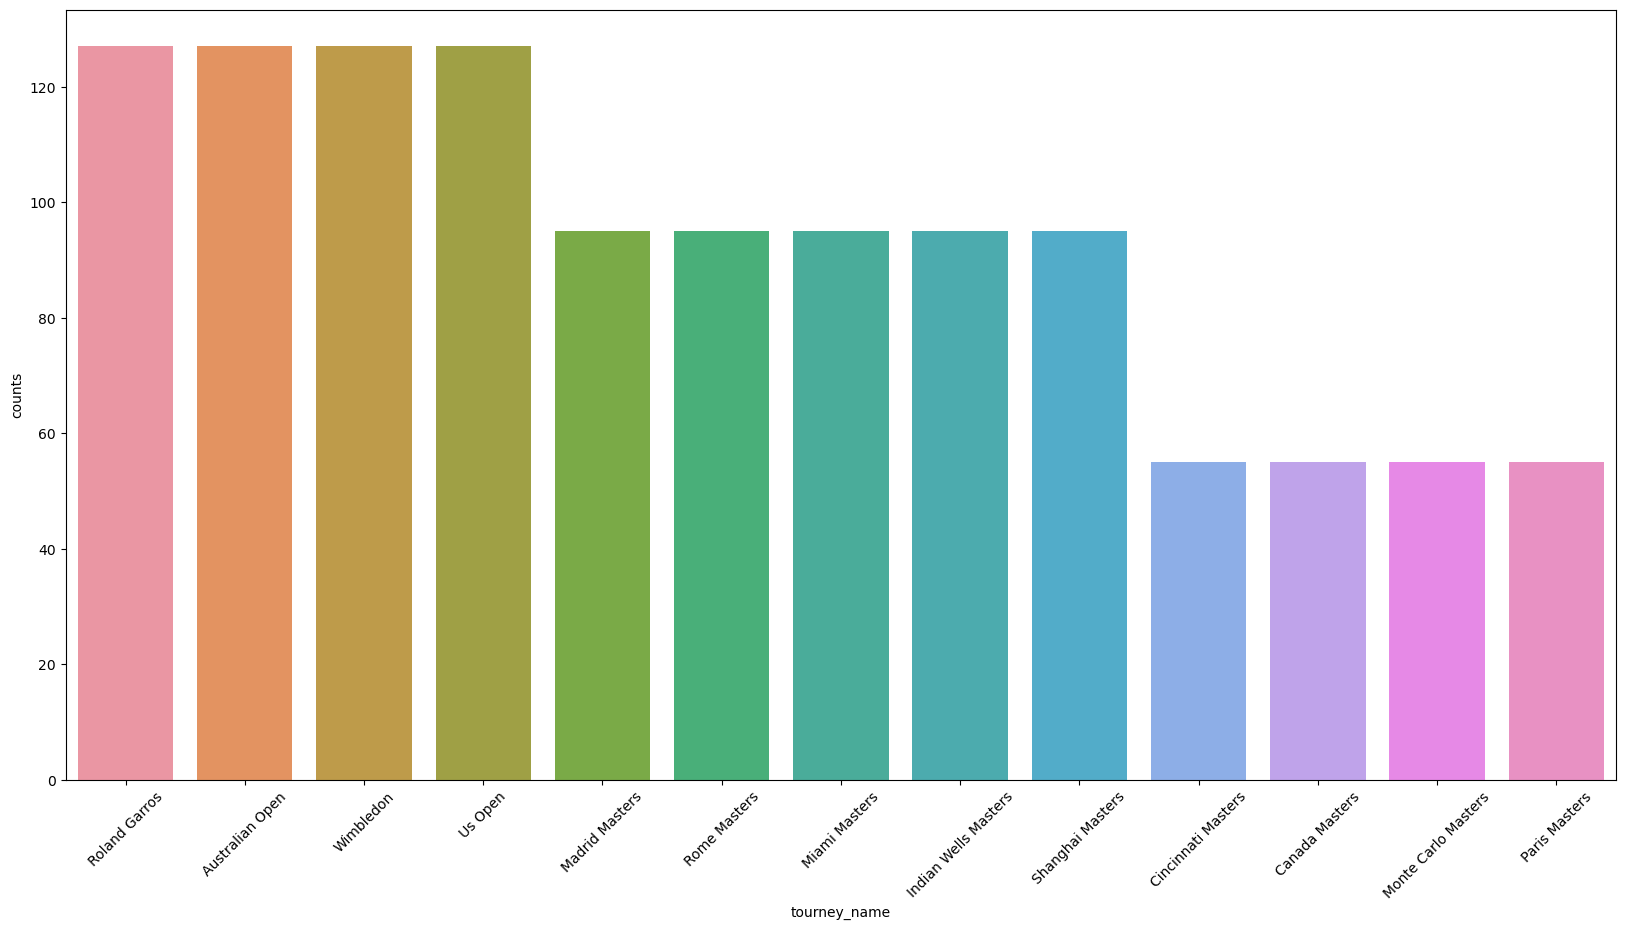

In [136]:
mt.figure( figsize=(20, 10))
sb.barplot(data  = top_tourney , x = 'tourney_name' , y = 'counts' )
mt.xticks(rotation = 45)
mt.show()

In [137]:
df = atp[['winner_hand' , 'tourney_level' , 'surface' , 'winner_age' , 'loser_age' , 'winner_rank' , 'loser_rank' , 'loser_hand']]
df['surface'].value_counts()

Hard     1704
Clay      901
Grass     328
Name: surface, dtype: int64

In [138]:
surf = df[['surface' , 'winner_hand' , 'loser_hand' , 'winner_age' , 'loser_age']]
surf = surf[((surf['winner_hand'] == 'R') & (surf['loser_hand']== 'L')) | ((surf['winner_hand'] == 'L') & (surf['loser_hand']== 'R'))]
surf['surface'].fillna('ND' , inplace= True)
surf

,surface,winner_hand,loser_hand,winner_age,loser_age
10,Hard,L,R,27.3,25.1
19,Hard,L,R,26.5,22.9
23,Hard,L,R,26.5,21.9
30,Hard,R,L,23.8,36.5
31,Hard,R,L,29.6,34.9
...,...,...,...,...,...
2906,ND,L,R,23.0,23.3
2951,Clay,L,R,32.9,25.7
2954,Clay,R,L,32.4,23.5
2971,ND,R,L,21.1,24.8


In [206]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_df = atp.select_dtypes(include=numerics)
numerical_df

,draw_size,match_num,winner_id,loser_id,best_of,minutes,year
0,18,300,126203,126610,3,212.625,2023
1,18,299,126207,207518,3,53.550,2023
2,18,296,126203,128034,3,163.800,2023
3,18,295,126207,200390,3,124.425,2023
4,18,292,126774,126610,3,244.125,2023
...,...,...,...,...,...,...,...
2758,8,293,208502,208134,5,85.050,2023
2759,8,292,208134,207925,5,209.475,2023
2761,8,290,209098,209414,5,170.100,2023
2763,8,288,209098,210506,5,234.675,2023


In [201]:
#distributinon of numerical datass
for i in range(numerical_df.shape[1]):
    

NameError: name 'summary' is not defined

In [141]:
age_vs_surface_stats = surf.groupby(['surface' , 'winner_hand']).agg( 
    med_win_age = ('winner_age' , np.median), med_L_age =  ('loser_age'  , (np.median)))
age_vs_surface_stats.reset_index(inplace=True)
age_vs_surface_stats

# for age metric median is a batter indicator of the players age

,surface,winner_hand,med_win_age,med_L_age
0,Clay,L,27.4,27.1
1,Clay,R,26.5,26.8
2,Grass,L,28.0,26.6
3,Grass,R,27.0,27.3
4,Hard,L,25.3,26.6
5,Hard,R,26.0,26.7
6,ND,L,23.0,23.3
7,ND,R,22.5,25.3


In [142]:
#Average age of players in each tourney level
atp.fillna('ND' , inplace=True)

In [143]:
atp[atp['winner_age'] =='ND']

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,year
2931,2023-M-DC-2023-WG2-M-HKG-LAT-01,Davis Cup WG2 R1: HKG vs LAT,Hard,4,D,2023-09-16,5,207132,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,2023


In [ ]:
atp = atp[(atp['winner_age'] != 'ND') & (atp['minutes'] != 'ND') & (atp['winner_ht'] != 'ND') & (atp['winner_rank'] != 'ND')]
we = ps.to_numeric(atp['minutes'])
type(we)

In [193]:
winner_count = atp.groupby('winner_ht').agg(count = ('winner_ht', np.size))
winner_count.reset_index(inplace= True)
winner_count

,winner_ht,count
0,170.0,64
1,172.0,2
2,173.0,6
3,175.0,25
4,178.0,80
5,180.0,109
6,183.0,434
7,185.0,534
8,188.0,524
9,190.0,17


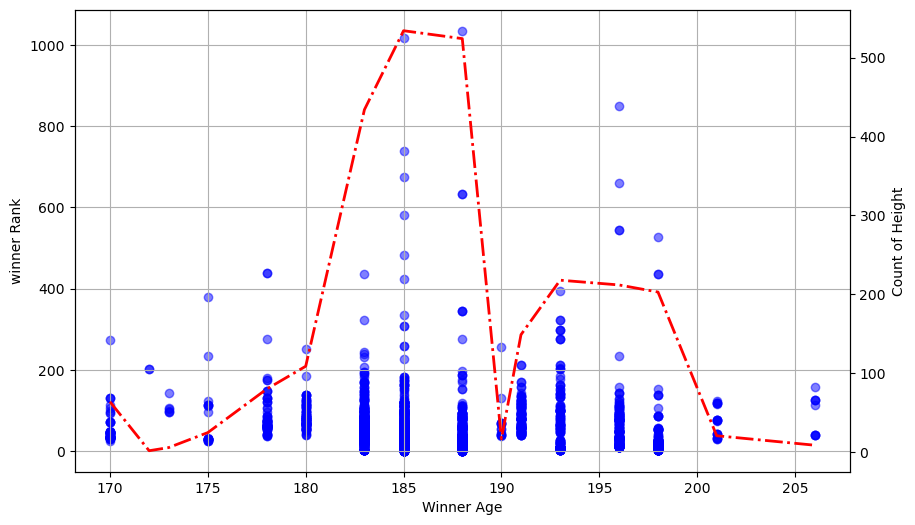

In [197]:
fg ,ax1 = mt.subplots(figsize= (10,6))
ax1.scatter(  y = atp['winner_rank'] , x = atp['winner_ht'] , c = 'blue' , alpha= .5)
ax1.set_xlabel('Winner Age')
ax1.set_ylabel('winner Rank')
ax3 = ax1.twinx()
ax3.plot(winner_count['winner_ht'] ,  winner_count['count'] ,  color = 'red' , linewidth = 2 , linestyle = '-.')
ax3.set_ylabel('Count of Height')
ax1.grid(True)
mt.show()

In [160]:
minutes = atp['minutes']
atp = atp[(atp['winner_age'] != 'ND') & (atp['winner_ht'] != 'ND') & (atp['minutes'] != 'ND')]
atp['minutes'] = minutes

In [161]:
atp['minutes'] = ps.to_numeric(atp['minutes']) * 3

Text(0, 0.5, 'Height (cms)')

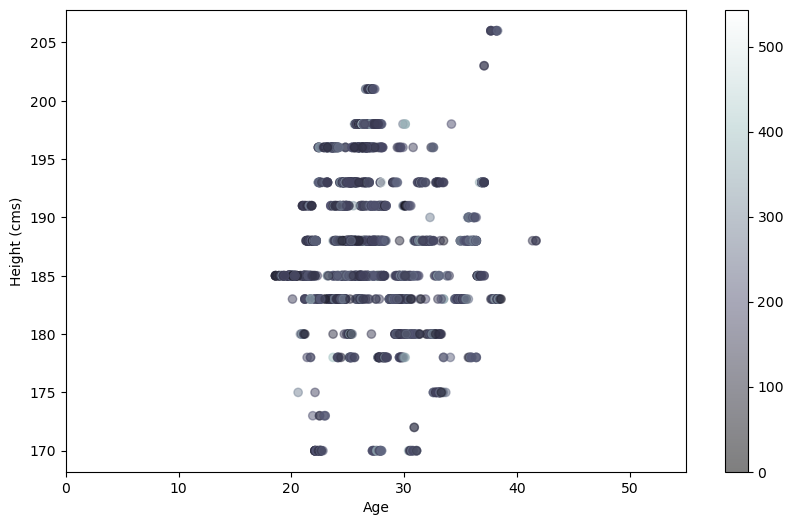

In [184]:
mt.figure(figsize=(10, 6))
mt.scatter(atp['winner_age'], atp['winner_ht'], c=atp['minutes'] , alpha=0.5 , cmap= 'bone')
mt.colorbar()
mt.xlim(0 , 55)
mt.xlabel('Age')
mt.ylabel('Height (cms)')

In [100]:
atp['score']

0                         7-6(4) 7-6(6)
1                           6-2 0-0 RET
2                         7-6(5) 7-6(5)
3                               6-3 6-3
4                        4-6 7-6(2) 6-4
                     ...               
2758                        4-1 4-1 4-2
2759       3-4(4) 4-2 4-3(1) 1-4 4-3(3)
2761                 4-2 2-4 4-3(7) 4-1
2763    4-2 4-3(3) 3-4(3) 3-4(5) 4-3(4)
2765              3-4(6) 4-2 4-3(5) 4-2
Name: score, Length: 2611, dtype: object

In [21]:
atp

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2023-9900,United Cup,Hard,18,A,20230102,300,126203,3.0,ND,...,62.0,47.0,15.0,12.0,9.0,9.0,9.0,3355.0,16.0,2375.0
1,2023-9900,United Cup,Hard,18,A,20230102,299,126207,ND,ND,...,12.0,8.0,3.0,4.0,1.0,3.0,19.0,2000.0,23.0,1865.0
2,2023-9900,United Cup,Hard,18,A,20230102,296,126203,3.0,ND,...,62.0,51.0,7.0,12.0,2.0,2.0,9.0,3355.0,10.0,2905.0
3,2023-9900,United Cup,Hard,18,A,20230102,295,126207,ND,ND,...,41.0,26.0,12.0,9.0,6.0,9.0,19.0,2000.0,245.0,220.0
4,2023-9900,United Cup,Hard,18,A,20230102,292,126774,1.0,ND,...,58.0,48.0,18.0,16.0,1.0,2.0,4.0,5550.0,16.0,2375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,2023-M-DC-2023-WG2-PO-RSA-LUX-01,Davis Cup WG2 PO: RSA vs LUX,ND,4,D,20230204,5,202335,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,1717.0,1.0
2982,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,ND,4,D,20230203,1,117365,ND,ND,...,ND,ND,ND,ND,ND,ND,990.0,11.0,279.0,190.0
2983,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,ND,4,D,20230203,2,121411,ND,ND,...,ND,ND,ND,ND,ND,ND,364.0,131.0,894.0,15.0
2984,2023-M-DC-2023-WG2-PO-TUN-CYP-01,Davis Cup WG2 PO: TUN vs CYP,ND,4,D,20230203,4,144949,ND,ND,...,ND,ND,ND,ND,ND,ND,894.0,15.0,285.0,184.0


In [28]:
winner_det = atp[['winner_entry' , 'winner_age' ]].sort_values('winner_entry')
winner_det.drop(winner_det[winner_det['winner_age'] == 'ND'].index , inplace  = True)

In [51]:
wd1 = winner_det.groupby('winner_entry').agg(median_winner_age = ('winner_age' , np.median), count_of_winner = ('winner_age' , np.size)).reset_index()
wd1

,winner_entry,median_winner_age,count_of_winner
0,Alt,21.70,4
1,LL,25.15,48
2,ND,26.10,2512
3,PR,36.90,26
4,Q,26.30,253
5,SE,27.30,8
6,WC,27.10,134


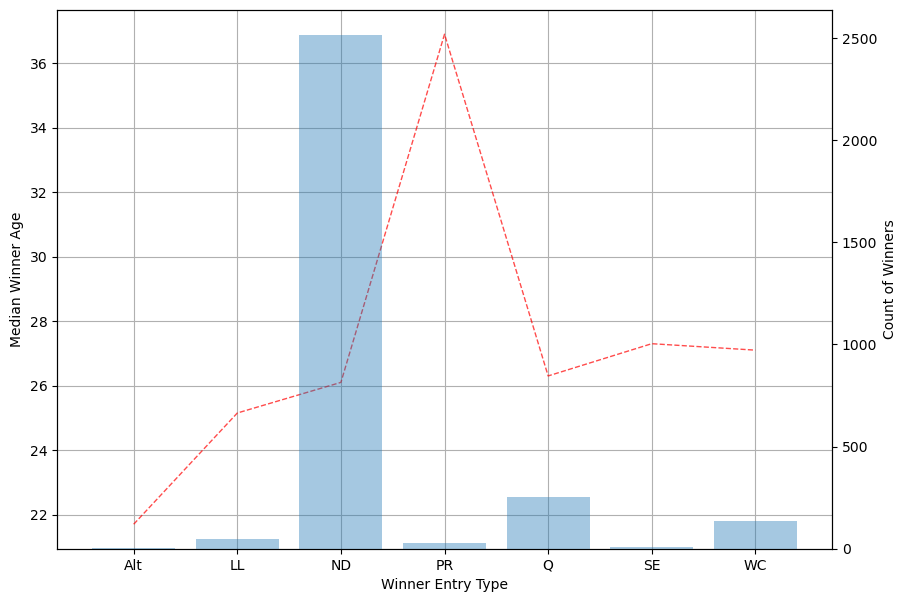

In [64]:
fig , ax =  mt.subplots(figsize = (10,7))
ax.plot( wd1['winner_entry'] , wd1['median_winner_age'] , color = 'red' , alpha = .7 , linewidth = 1 , linestyle= '--' )
ax.set_xlabel('Winner Entry Type')
ax.set_ylabel('Median Winner Age')
ax2 = ax.twinx()
ax2.bar( wd1['winner_entry'] , wd1['count_of_winner']  , alpha = .4)
ax2.set_ylabel('Count of Winners')
ax.grid(True)
mt.show()